<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related/blob/main/e_commerce_Investing_in_new_Ads_design_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# eCommerce Ad Simulation

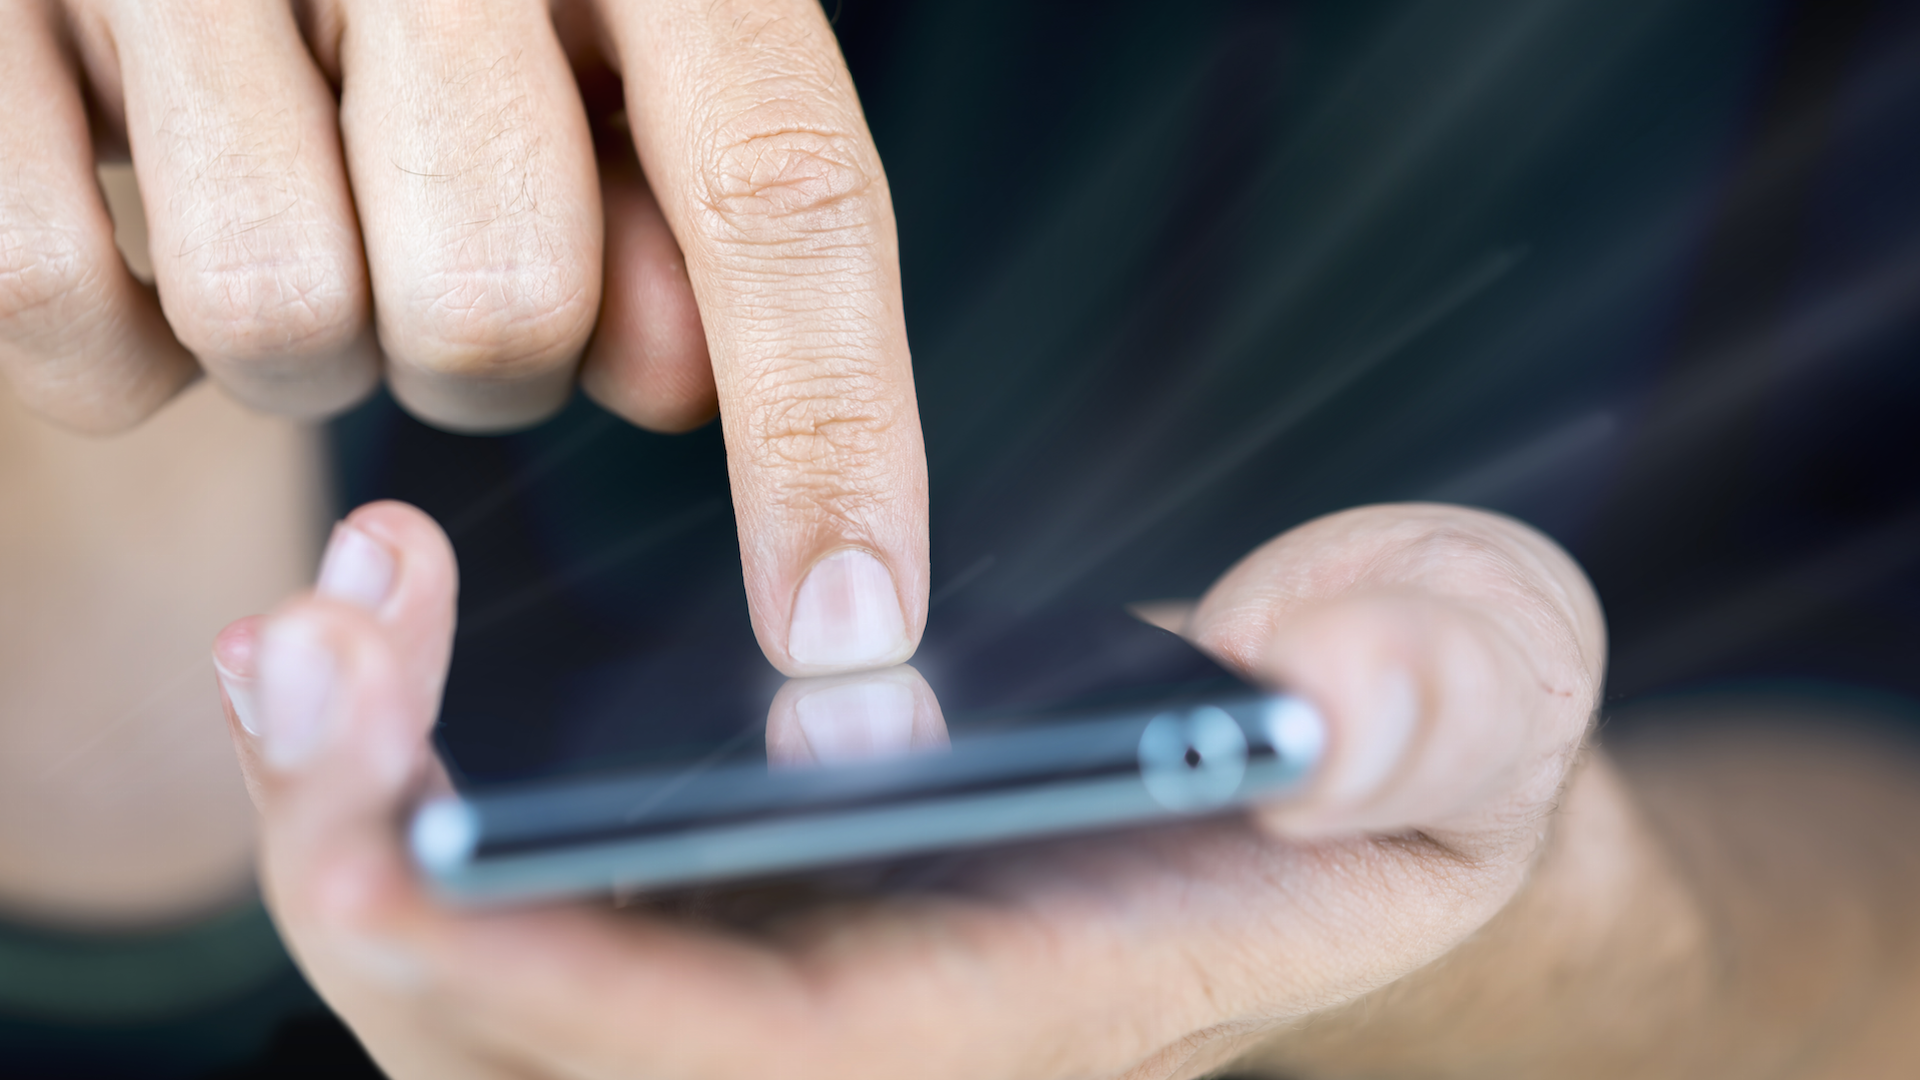

Funnel:

Let's say have we have many internet Ads running through different platforms. The marketing funnel can be separated into steps:

- Ad Impressions:
Most of the time it's possible to know the average Ad impressions per minute/hour/day. Each impression is independent to others, and it will show or not show to the users (Bernoulli Trials). This process can be modeled as a poisson distribution function.

- Click: 
In this part of the funnel the customer has a binary decision, click or not to click. Can be modeled as a Binomial distribution that requires a rate of success (Click/Ad impressions, this is called CTR)

- Signup: Binomial distribution, the rate of success is the signup rate (Signup/Click)

- Purchase: Binomial distribution, the rate of success is the purchase rate (Purchase/Signup)

- Avg Purchase Value: Many times this part can be modeled as exponential distribution function but also Normal distribution could be suited. If dataset, better do EDA first)

Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. On average 8% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. We know that purchase value per customer has averaged around $700.

## Goal 

In this project i'm going to calculate the expected return of an investment in a New Ad design that costs $ 10.000. That is expected to increase from 10% to 20% the click through rate (CTR).



## Importing 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Actual Flow 

In [ ]:
# CTR
actual_CTR = 0.01
# Signup Rate
actual_signupr = 0.2
# Mean Ad impressions. Mean at 10000 a week with std of 200.
mean_ad_impressions, std_ad_impressions = 10000, 200
# Average ticket
avg_tick = 700

In [ ]:
sims = 10000

# To first get signup rates we start with ad impressions:
lam_week = np.random.normal(loc=mean_ad_impressions, scale=std_ad_impressions, size=sims)
week_imp = np.random.poisson(lam=lam_week)

# Simulate CTR on Ad impressions
clicks = np.random.binomial(week_imp, p=actual_CTR)

# Simulate Signups
signups = np.random.binomial(clicks, p=actual_signupr)

# Simulate purchases given the information
purchases = np.random.binomial(signups, p=0.08)
purchase_values = np.random.exponential(scale=avg_tick, size=sims)

sales = purchase_values * purchases
print(sales)

[4022.35756072    0.          693.68838279 ...  213.85497947 3242.44187077
 1056.12135925]


## Plot histogram of simulated sales

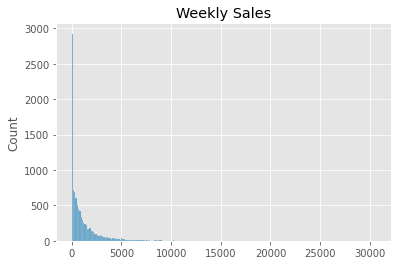

In [ ]:
sns.histplot(sales)
plt.title('Weekly Sales')
plt.show()

## Defining a function to the problem

In [ ]:
def get_wsales(actual_CTR, actual_signupr, mean_ad_impressions, std_ad_impressions, avg_tick, sims):
  """ Gives simulated sales from expected marketing funnel rates"""
  lam_week = np.random.normal(loc=mean_ad_impressions, scale=std_ad_impressions, size=sims)
  week_imp = np.random.poisson(lam=lam_week)

  # Simulate CTR on Ad impressions
  clicks = np.random.binomial(week_imp, p=actual_CTR)

  # Simulate Signups
  signups = np.random.binomial(clicks, p=actual_signupr)

  # Simulate purchases given the information
  purchases = np.random.binomial(signups, p=0.08)
  purchase_values = np.random.exponential(scale=avg_tick, size=sims)

  return  purchase_values * purchases

## Comparing sales before and after the change in Ad designs.

In [ ]:
# CTR
new_CTR = np.random.uniform(low=0.01*1.10, high=0.01*1.20)
# Signup Rate
actual_signupr = 0.2
# Mean Ad impressions. Mean at 10000 a week with std of 200.
mean_ad_impressions, std_ad_impressions = 10000, 200
# Average ticket
avg_tick = 700
# Number of simulations
sims = 5000

sim_sales_before = get_wsales(actual_CTR, actual_signupr, mean_ad_impressions, std_ad_impressions, avg_tick, sims)
sim_sales_after = get_wsales(new_CTR, actual_signupr, mean_ad_impressions, std_ad_impressions, avg_tick, sims)

diff_sales = sim_sales_after - sim_sales_before

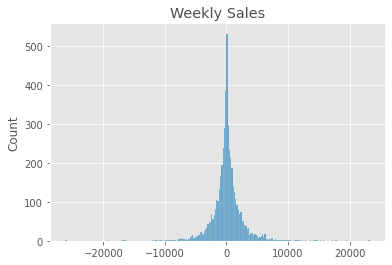


 The expected rise of weekly sales has an average of: 110.94846008568413

 The expected rise of weekly sales has an stf of: 2524.9535652337813


In [ ]:
sns.histplot(diff_sales)
plt.title('Weekly Sales', alpha=0.7)
plt.show()

print('\n The expected rise of weekly sales has an average of: {}'.format(diff_sales.mean()))
print('\n The expected rise of weekly sales has an stf of: {}'.format(diff_sales.std()))

## CI calculation of expected rise of weekly sales

In [ ]:
mean_diff_sales = np.empty(sims)

for i in range(sims):
  sim_sales_before = get_wsales(actual_CTR, actual_signupr, mean_ad_impressions, std_ad_impressions, avg_tick, sims)
  sim_sales_after = get_wsales(new_CTR, actual_signupr, mean_ad_impressions, std_ad_impressions, avg_tick, sims)

  mean_diff_sales[i] = (sim_sales_after - sim_sales_before).mean()

print('\n The expected rise of weekly sales has an average of: {}'.format(mean_diff_sales.mean()))
print('\n Confidence Interval 95% of mean: {}'.format(np.percentile(mean_diff_sales, [2.5,97.5])))



 The expected rise of weekly sales has an average of: 112.49893108794983

 mean Confidence Interval: [ 43.11007001 180.44289827]


## The final decision

In [ ]:
# Gross margin rate on product sales
mg_rate = 0.3

# Calculate yearly minimum dollar margin on the lowest expected change of sales
dollar_mg = np.percentile(mean_diff_sales, [2.5,97.5])[0] * mg_rate
year_dollar_mg = dollar_mg *52 

# let's say this changen is permanent in the company
# we'll calculate the present value as an annuity:

risk_yield = 0.05
min_expected_gain = year_dollar_mg / risk_yield
min_expected_gain

13450.341841914336

Minimum expected gain is larger than the cost of $10.000 for the new ad design. 

Is recommended to make the investment.